# Full example of processing samples

In [1]:
# This illustrates the simplest, smallest batch (n=2) of methylation array sample results using methylprep and methylcheck.
#python 3.7
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import methylprep/methylcheck: run from the methylprep folder; validate using right location files for testing
from pprint import pprint as pp
import sys
import os
sys.path.insert(0,"/Users/mmaxmeister/legx/methylprep") # not needed if pip installed
import methylprep

In [10]:
# load sample data
os.chdir('/Users/mmaxmeister/legx/methylprep')
data_dir = 'docs/example_data/GSE69852'
datas = methylprep.run_pipeline(data_dir)

# this next line is an unnecessary step if you add --betas to command line, or betas=True to the run_pipeline function.
# betas = methylprep.consolidate_values_for_sheet(datas)
# NOTES:
#   the default "export" output is a CSV file for each sample
#   the default python interpreter scripted output is a list of dataframes, one per sample.
#   this transforms methylprep's output into a single dataframe of beta values, usable with methylcheck.

100%|██████████| 2/2 [00:19<00:00,  9.93s/it]


In [11]:
# load sample data -- simpler way
os.chdir('/Users/mmaxmeister/legx/methylprep')
data_dir = 'docs/example_data/GSE69852'
betas = methylprep.run_pipeline(data_dir, betas=True)

100%|██████████| 2/2 [00:19<00:00,  9.97s/it]


In [13]:
betas.head()

,9247377093_R02C01,9247377085_R04C02
IlmnID,,
cg00035864,0.236234,0.308176
cg00061679,0.427194,0.525169
cg00063477,0.929039,0.932739
cg00121626,0.481058,0.330045
cg00223952,0.044029,0.022201


### beta_density_plot

/Users/mmaxmeister/legx/methylprep
2


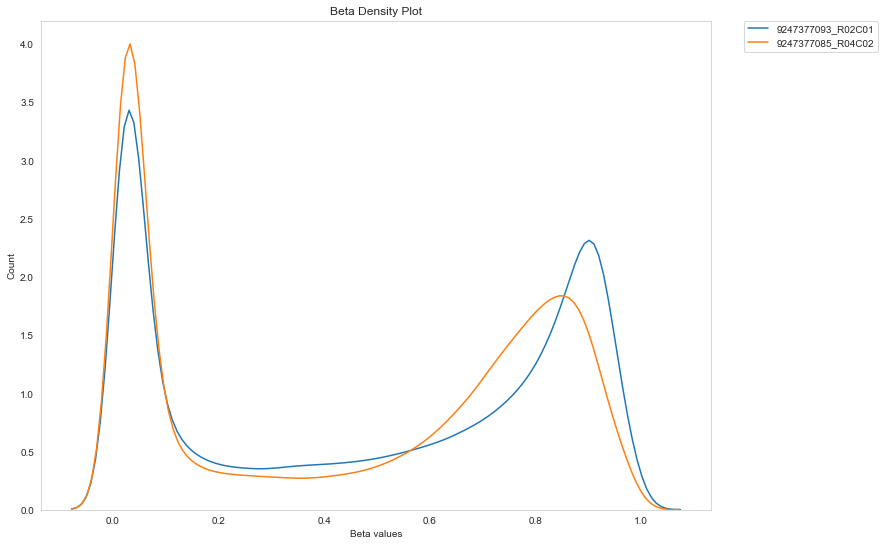

In [19]:
#plot each sample separately
print(os.getcwd()) #chdir('/Users/mmaxmeister/legx/methylcheck')
import methylcheck
methylcheck.beta_density_plot(betas)

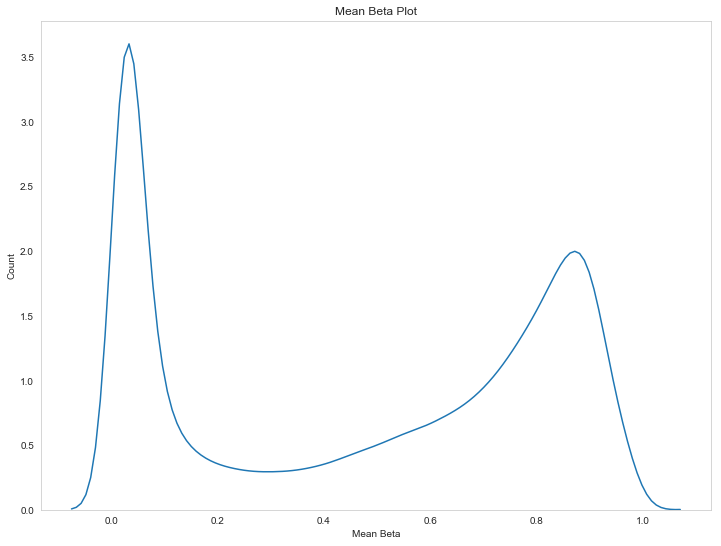

In [20]:
# this is a mushed average of all samples into one line.
methylcheck.mean_beta_plot(betas)

2it [00:00, 11.76it/s]

Calculating area under curve for each sample.


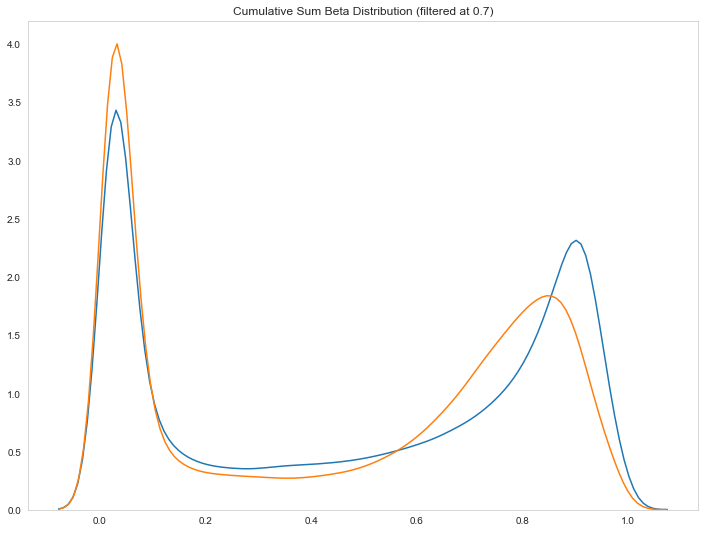

In [21]:
filtered_df = methylcheck.cumulative_sum_beta_distribution(betas, cutoff=0.7, plot=True)
# use this to remove outliers, based on the cutoff value.
# this looks identical the beta_density_plot because no samples were removed.